In [234]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
premier_league_start_year = '1992'
liverpool_url = 'https://en.wikipedia.org/wiki/List_of_Liverpool_F.C._seasons'
man_u_url = 'https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons'
arsenal_url = 'https://en.wikipedia.org/wiki/List_of_Arsenal_F.C._seasons'
man_city_url = 'https://en.wikipedia.org/wiki/List_of_Manchester_City_F.C._seasons'

In [252]:
tables = pd.read_html(liverpool_url)
liverpool_df = tables[2]
liverpool_df = liverpool_df[liverpool_df['League', 'Division'] == 'PL']
liverpool_df.columns = liverpool_df.columns.droplevel(0)
liverpool_df.head()

,Season,Division,P,W,D,L,F,A,Pts,Pos,FA Cup,EFL Cup,Comm. Shield,CL,EL,CWC,Super Cup,Club World Cup,Name,Goals
92,1992–93,PL,42,16,11,15,62,55,59,6th,R3,R4,RU,—,—,R2,—,—,Ian Rush,22
93,1993–94,PL,42,17,9,16,59,55,60,8th,R3,R4,—,—,—,—,—,—,Ian Rush,19
94,1994–95,PL,42,21,11,10,65,37,74,4th,R6,W,—,—,—,—,—,—,Robbie Fowler,31
95,1995–96,PL,38,20,11,7,70,34,71,3rd,RU,R4,—,—,R2,—,—,—,Robbie Fowler,36
96,1996–97,PL,38,19,11,8,62,37,68,4th,R4,R5,—,—,—,SF,—,—,Robbie Fowler,31


In [253]:
tables = pd.read_html(man_u_url)
man_u_df = tables[2]
man_u_df = man_u_df[man_u_df['League', 'Division'] == 'Prem']
man_u_df.columns = man_u_df.columns.droplevel(0)
man_u_df.head()

,Season,Division,P,W,D,L,GF,GA,Pts,Pos,FA Cup,EFL Cup,CommunityShield,UEFAFIFA,Name(s),Goals
98,1992–93,Prem,42,24,12,6,67,31,84,1st,R5,R3,NaN,UEFA Cup – R1,Mark Hughes,16
99,1993–94,Prem,42,27,11,4,80,38,92,1st,Winners,Runners-up,Winners,Champions League – R2,Eric Cantona,25
100,1994–95,Prem,42,26,10,6,77,28,88,2nd,Runners-up,R3,Winners,Champions League – Group,Andrei Kanchelskis,15
101,1995–96,Prem,38,25,7,6,73,35,82,1st,Winners,R2,NaN,UEFA Cup – R1,Eric Cantona,19
102,1996–97,Prem,38,21,12,5,76,44,75,1st,R4,R4,Winners,Champions League – SF,Ole Gunnar Solskjær,19


In [254]:
tables = pd.read_html(arsenal_url)
arsenal_df = tables[3]
arsenal_df = arsenal_df[arsenal_df['Division', 'League[58]'] == 'Prem']
arsenal_df.columns = arsenal_df.columns.droplevel(1)
arsenal_df.head()

,Season,Division,P,W,D,L,GF,GA,Pts,Pos,FA Cup[56][d],LeagueCup[57],CommunityShield[57],Competition,Result,Name(s),Goals
99,1992–93,Prem,42,15,11,16,40,38,56,10th,W,W,—,—,—,Ian Wright,30
100,1993–94,Prem,42,18,17,7,53,28,71,4th,R4,R4,RU,Cup Winners' Cup,W,Ian Wright,35
101,1994–95,Prem,42,13,12,17,52,49,51,12th,R3,QF,—,Cup Winners' CupSuper Cup,RURU,Ian Wright,30
102,1995–96,Prem,38,17,12,9,49,32,63,5th,R3,SF,—,—,—,Ian Wright,22
103,1996–97,Prem,38,19,11,8,62,32,68,3rd,R4,R4,—,UEFA Cup,R1,Ian Wright,30


In [255]:
tables = pd.read_html(man_city_url)
man_city_df = tables[0]
man_city_df = man_city_df[man_city_df['League', 'Division (Tier)'] == 'Prem (1)']
man_city_df.columns = man_city_df.columns.droplevel(0)
man_city_df.head()


,Season,Division (Tier),P,W,D,L,GF,GA,Pts,Pos,FA Cup,League Cup,"UEFA, FIFA / Other","UEFA, FIFA / Other.1",Top scorer[a],Goals
114,1993–94,Prem (1),42,9,18,15,38,49,45,16th,R4,R4,NaN,NaN,Niall QuinnMike Sheron,6
115,1994–95,Prem (1),42,12,13,17,53,64,49,17th,R5,QF,NaN,NaN,Uwe Rösler,22
116,1995–96,Prem (1),38,9,11,18,33,58,38,18th,R5,R3,NaN,NaN,Uwe Rösler,13
121,2000–01,Prem (1),38,8,10,20,41,65,34,18th,R5,QF,NaN,NaN,Shaun Goater,11
123,2002–03,Prem (1),38,15,6,17,47,54,51,9th,R3,R3,NaN,NaN,Nicolas Anelka,14


In [256]:
dfs = [arsenal_df, man_city_df, man_u_df, liverpool_df]

In [257]:
for df in dfs:
    df.drop(df.columns.difference(['Season','Pos']), 1, inplace=True)
    df['Pos'] = df['Pos'].str.replace(r'\D', '')
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df.dropna(inplace=True)
    df['Pos'] = df['Pos'].astype(int)

c:\program files (x86)\python37-32\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python37-32\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [258]:
liverpool_df['liverpool_position'] = liverpool_df['Pos']
man_u_df['man_u_position'] = man_u_df['Pos']
arsenal_df['arsenal_position'] = arsenal_df['Pos']
man_city_df['man_city_position'] = man_city_df['Pos']

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [259]:
for df in dfs:
    df.drop('Pos', 1, inplace=True)

c:\program files (x86)\python37-32\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df = pd.merge(liverpool_df, man_u_df, on=['Season'])
df = pd.merge(df, man_city_df, on=['Season'])
df = pd.merge(df, arsenal_df, on=['Season'])

In [262]:
df

,Season,liverpool_position,man_u_position,man_city_position,arsenal_position
0,1993–94,8,1,16,4
1,1994–95,4,2,17,12
2,1995–96,3,1,18,5
3,2000–01,3,1,18,2
4,2002–03,5,1,9,2
5,2003–04,4,3,16,1
6,2004–05,5,3,8,2
7,2005–06,3,2,15,4
8,2006–07,3,1,14,4
9,2007–08,4,1,9,3


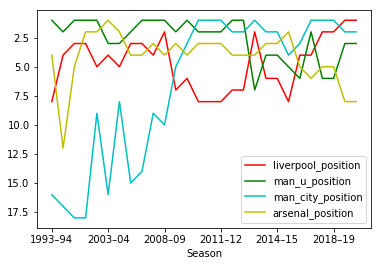

In [270]:
fig, ax = plt.subplots()
df.plot(x='Season', y='liverpool_position', ax=ax, c='r')
df.plot(x='Season', y='man_u_position', ax=ax, c='g')
df.plot(x='Season', y='man_city_position', ax=ax, c='c')
df.plot(x='Season', y='arsenal_position', ax=ax, c='y')
ax.invert_yaxis()
plt.show()
plt.close()